# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 자동차수리

In [10]:
# 자동차수리만 남기기
ap_car = df_ap_quarter[df_ap_quarter.업종명 == '자동차수리'].reset_index().drop('index', axis=1)
ap_car

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,정비/수리,자동차수리,압구정동,901568537,26,1,1
1,2017-2,서비스,정비/수리,자동차수리,압구정동,925697515,25,0,1
2,2017-3,서비스,정비/수리,자동차수리,압구정동,918495141,25,0,0
3,2017-4,서비스,정비/수리,자동차수리,압구정동,817134254,25,0,0
4,2018-1,서비스,정비/수리,자동차수리,압구정동,1183294525,26,1,0
5,2018-2,서비스,정비/수리,자동차수리,압구정동,1430130276,25,1,2
6,2018-3,서비스,정비/수리,자동차수리,압구정동,1473284032,25,0,0
7,2018-4,서비스,정비/수리,자동차수리,압구정동,1215917356,23,0,2
8,2019-1,서비스,정비/수리,자동차수리,압구정동,824804104,23,0,0
9,2019-2,서비스,정비/수리,자동차수리,압구정동,1138849993,23,0,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_car['성장성'] = ap_car['분기당_매출_금액'] / ap_car['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_car['성장성'][0] = 1

ap_car

<ipython-input-11-544444e24014>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_car['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,정비/수리,자동차수리,압구정동,901568537,26,1,1,1.000000
1,2017-2,서비스,정비/수리,자동차수리,압구정동,925697515,25,0,1,1.026763
2,2017-3,서비스,정비/수리,자동차수리,압구정동,918495141,25,0,0,0.992220
3,2017-4,서비스,정비/수리,자동차수리,압구정동,817134254,25,0,0,0.889645
4,2018-1,서비스,정비/수리,자동차수리,압구정동,1183294525,26,1,0,1.448103
5,2018-2,서비스,정비/수리,자동차수리,압구정동,1430130276,25,1,2,1.208600
6,2018-3,서비스,정비/수리,자동차수리,압구정동,1473284032,25,0,0,1.030175
7,2018-4,서비스,정비/수리,자동차수리,압구정동,1215917356,23,0,2,0.825311
8,2019-1,서비스,정비/수리,자동차수리,압구정동,824804104,23,0,0,0.678339
9,2019-2,서비스,정비/수리,자동차수리,압구정동,1138849993,23,0,0,1.380752


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_car['개업률'] = (ap_car['개업점포수'] / ap_car['총 점포수']) * 100
ap_car['폐업률'] = (ap_car['폐업점포수'] / ap_car['총 점포수']) * 100
ap_car['순점포증감률'] = ((ap_car['개업점포수'] - ap_car['폐업점포수']) / ap_car['총 점포수']) * 100

ap_car

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,서비스,정비/수리,자동차수리,압구정동,901568537,26,1,1,1.000000,3.846154,3.846154,0.000000
1,2017-2,서비스,정비/수리,자동차수리,압구정동,925697515,25,0,1,1.026763,0.000000,4.000000,-4.000000
2,2017-3,서비스,정비/수리,자동차수리,압구정동,918495141,25,0,0,0.992220,0.000000,0.000000,0.000000
3,2017-4,서비스,정비/수리,자동차수리,압구정동,817134254,25,0,0,0.889645,0.000000,0.000000,0.000000
4,2018-1,서비스,정비/수리,자동차수리,압구정동,1183294525,26,1,0,1.448103,3.846154,0.000000,3.846154
5,2018-2,서비스,정비/수리,자동차수리,압구정동,1430130276,25,1,2,1.208600,4.000000,8.000000,-4.000000
6,2018-3,서비스,정비/수리,자동차수리,압구정동,1473284032,25,0,0,1.030175,0.000000,0.000000,0.000000
7,2018-4,서비스,정비/수리,자동차수리,압구정동,1215917356,23,0,2,0.825311,0.000000,8.695652,-8.695652
8,2019-1,서비스,정비/수리,자동차수리,압구정동,824804104,23,0,0,0.678339,0.000000,0.000000,0.000000
9,2019-2,서비스,정비/수리,자동차수리,압구정동,1138849993,23,0,0,1.380752,0.000000,0.000000,0.000000


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 자동차수리만 남기기
gangnam_car = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '자동차수리'].reset_index()

################################################################################################################################################################################################

ap_car['시장성'] = (ap_car['분기당_매출_금액'] / ap_car['총 점포수']) - (gangnam_car['분기당_매출_금액'] / gangnam_car['총 점포수'])

ap_car = ap_car[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_car

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,자동차수리,901568537,1.000000,0.000000,-2.764470e+07
1,2017-2,자동차수리,925697515,1.026763,-4.000000,-3.335310e+07
2,2017-3,자동차수리,918495141,0.992220,0.000000,-4.359292e+07
3,2017-4,자동차수리,817134254,0.889645,0.000000,-4.111920e+07
4,2018-1,자동차수리,1183294525,1.448103,3.846154,-2.383874e+07
5,2018-2,자동차수리,1430130276,1.208600,-4.000000,-2.053729e+07
6,2018-3,자동차수리,1473284032,1.030175,0.000000,-2.369041e+07
7,2018-4,자동차수리,1215917356,0.825311,-8.695652,-2.456666e+07
8,2019-1,자동차수리,824804104,0.678339,0.000000,-1.988631e+07
9,2019-2,자동차수리,1138849993,1.380752,0.000000,-1.419268e+07


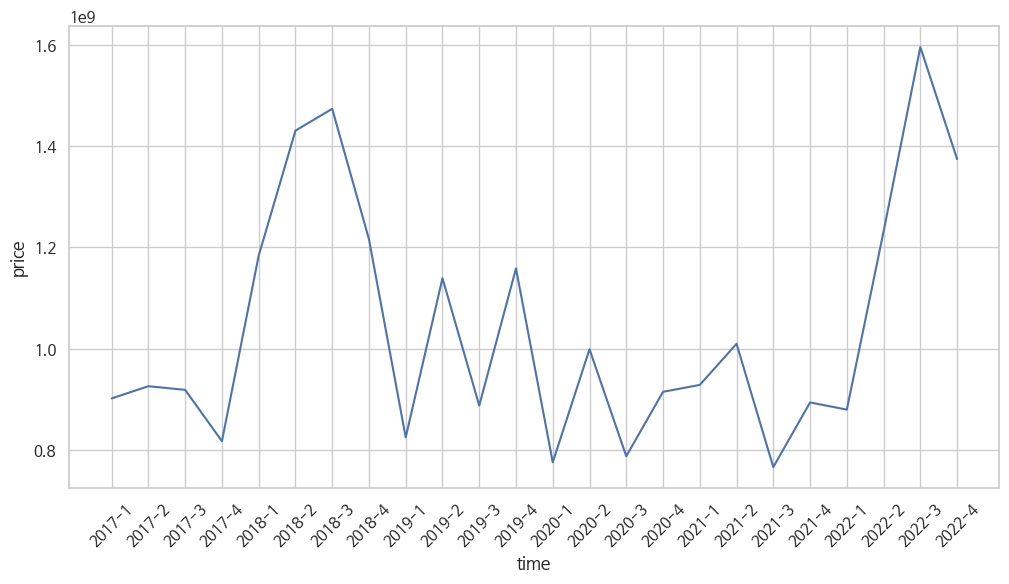

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_car['분기'], y=ap_car['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_car[['성장성', '시장성', '순점포증감률']]
y = ap_car.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.764470e+07  0.000000
1   1.026763 -3.335310e+07 -4.000000
2   0.992220 -4.359292e+07  0.000000
3   0.889645 -4.111920e+07  0.000000
4   1.448103 -2.383874e+07  3.846154
5   1.208600 -2.053729e+07 -4.000000
6   1.030175 -2.369041e+07  0.000000
7   0.825311 -2.456666e+07 -8.695652
8   0.678339 -1.988631e+07  0.000000
9   1.380752 -1.419268e+07  0.000000
10  0.779291 -2.316269e+07  0.000000
11  1.305043 -1.218366e+07  0.000000
12  0.669568 -2.006626e+07  0.000000
13  1.287769 -2.280562e+07  0.000000
14  0.788538 -2.984190e+07  0.000000
15  1.161467 -2.221798e+07  4.347826
16  1.014860 -1.800176e+07 -4.545455
17  1.087461 -1.858131e+07  0.000000
18  0.758861 -3.001409e+07  0.000000
19  1.166635 -3.355598e+07  0.000000
20  0.984134 -1.752054e+07  0.000000
21  1.399742 -1.644707e+07  4.166667
22  1.295714  7.789677e+05 -4.347826
23  0.861454 -1.452405e+07  0.000000
---------------------------------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.80426258 1.         0.33333333]
 [0.24647128 0.6551191  0.66666667]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2616
Epoch 1: val_loss improved from inf to 0.04146, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.2616 - val_loss: 0.0415
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2605
Epoch 2: val_loss improved from 0.04146 to 0.04101, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2605 - val_loss: 0.0410
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2595
Epoch 3: val_loss improved from 0.04101 to 0.04056, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2595 - val_loss: 0.0406
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2584
Epoch 4: val_loss improved from 0.04056 to 0.04012, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.2584 - val_loss: 0.0401
Epoch 5/300
1/1 [================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 658ms/step
[[0.13947912]
 [0.15397038]
 [0.16671795]
 [0.18096389]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.136860,0.139479
2022-2,0.560907,0.153970
2022-3,1.000000,0.166718
2022-4,0.733446,0.180964


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_car의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.136860,0.139479,879477806,881649600.0,-2171794.0
2022-2,0.560907,0.153970,1231041667,893663872.0,337377795.0
2022-3,1.000000,0.166718,1595078521,904232384.0,690846137.0
2022-4,0.733446,0.180964,1374087340,916043264.0,458044076.0


In [26]:
df_test = df_test.reset_index()

### 결과

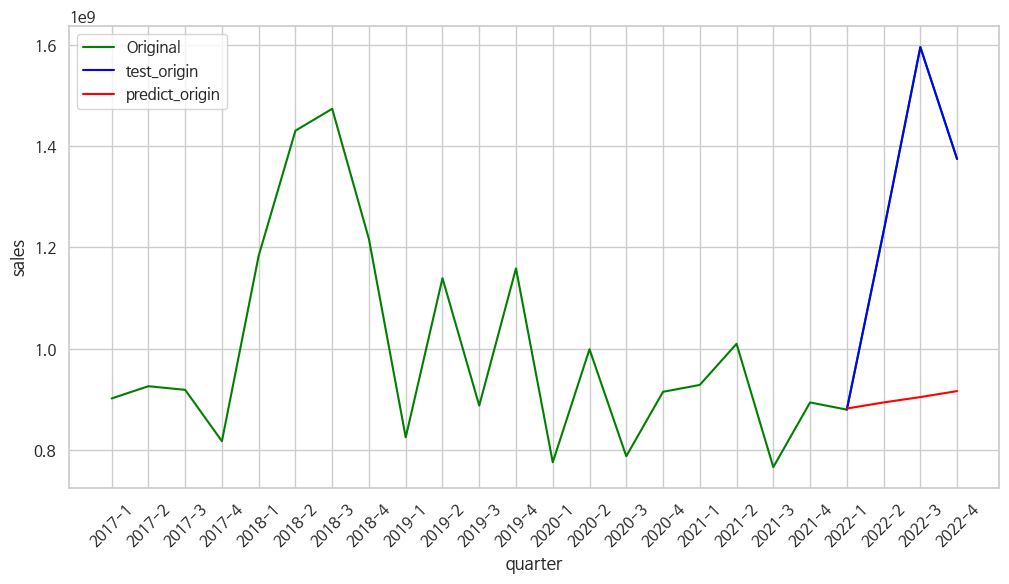

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.710241e+08
std      2.888286e+08
min     -2.171794e+06
25%      2.524904e+08
50%      3.977109e+08
75%      5.162446e+08
max      6.908461e+08
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.14209099]]
--------------------------------------------------------------------------------
예측된 매출  : 883814976.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_car.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0    901568537 -2.764470e+07  0.000000
1    925697515 -3.335310e+07 -4.000000
2    918495141 -4.359292e+07  0.000000
3    817134254 -4.111920e+07  0.000000
4   1183294525 -2.383874e+07  3.846154
5   1430130276 -2.053729e+07 -4.000000
6   1473284032 -2.369041e+07  0.000000
7   1215917356 -2.456666e+07 -8.695652
8    824804104 -1.988631e+07  0.000000
9   1138849993 -1.419268e+07  0.000000
10   887495626 -2.316269e+07  0.000000
11  1158220243 -1.218366e+07  0.000000
12   775506978 -2.006626e+07  0.000000
13   998673949 -2.280562e+07  0.000000
14   787492836 -2.984190e+07  0.000000
15   914646952 -2.221798e+07  4.347826
16   928238918 -1.800176e+07 -4.545455
17  1009423674 -1.858131e+07  0.000000
18   766012136 -3.001409e+07  0.000000
19   893656535 -3.355598e+07  0.000000
20   879477806 -1.752054e+07  0.000000
21  1231041667 -1.644707e+07  4.166667
22  1595078521  7.789677e+05 -4.347826
23  1374087340 -1.452405e+07  0.000000
-------------------------

In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         1.         0.33333333]
 [0.73344573 0.6551191  0.66666667]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3722
Epoch 1: val_loss improved from inf to 0.26775, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3722 - val_loss: 0.2678
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3711
Epoch 2: val_loss improved from 0.26775 to 0.26668, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.3711 - val_loss: 0.2667
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3699
Epoch 3: val_loss improved from 0.26668 to 0.26561, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.3699 - val_loss: 0.2656
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3687
Epoch 4: val_loss improved from 0.26561 to 0.26454, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.3687 - val_loss: 0.2645
Epoch 5/300
1/1 [=================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 622ms/step
[[0.3892756 ]
 [0.40606803]
 [0.47422642]
 [0.5369663 ]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.404049,0.389276
2022-2,0.937882,0.406068
2022-3,0.804263,0.474226
2022-4,0.246471,0.536966


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 3].values       # 성장성이 ap_car의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.404049,0.389276,0.984134,0.972633,0.011502
2022-2,0.937882,0.406068,1.399742,0.985706,0.414036
2022-3,0.804263,0.474226,1.295714,1.038770,0.256945
2022-4,0.246471,0.536966,0.861454,1.087615,-0.226161


### 결과

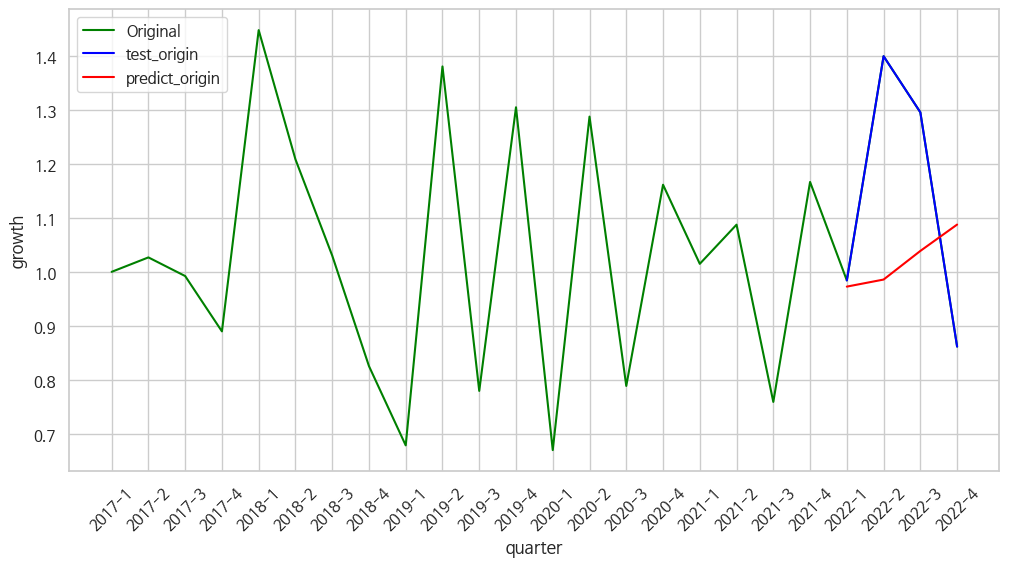

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.114080
std      0.280874
min     -0.226161
25%     -0.047914
50%      0.134223
75%      0.296217
max      0.414036
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.4679069]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0338497161865234 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_car[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_car.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000   901568537  0.000000
1   1.026763   925697515 -4.000000
2   0.992220   918495141  0.000000
3   0.889645   817134254  0.000000
4   1.448103  1183294525  3.846154
5   1.208600  1430130276 -4.000000
6   1.030175  1473284032  0.000000
7   0.825311  1215917356 -8.695652
8   0.678339   824804104  0.000000
9   1.380752  1138849993  0.000000
10  0.779291   887495626  0.000000
11  1.305043  1158220243  0.000000
12  0.669568   775506978  0.000000
13  1.287769   998673949  0.000000
14  0.788538   787492836  0.000000
15  1.161467   914646952  4.347826
16  1.014860   928238918 -4.545455
17  1.087461  1009423674  0.000000
18  0.758861   766012136  0.000000
19  1.166635   893656535  0.000000
20  0.984134   879477806  0.000000
21  1.399742  1231041667  4.166667
22  1.295714  1595078521 -4.347826
23  0.861454  1374087340  0.000000
--------------------------------------------------------------------------------
             시장성
0  -2.764470e+07
1  -3.3353

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.80426258 1.         0.33333333]
 [0.24647128 0.73344573 0.66666667]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2519
Epoch 1: val_loss improved from inf to 0.21754, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2519 - val_loss: 0.2175
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2508
Epoch 2: val_loss improved from 0.21754 to 0.21650, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2508 - val_loss: 0.2165
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2497
Epoch 3: val_loss improved from 0.21650 to 0.21545, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2497 - val_loss: 0.2155
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2486
Epoch 4: val_loss improved from 0.21545 to 0.21442, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.2486 - val_loss: 0.2144
Epoch 5/300
1/1 [=================

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 904ms/step
[[0.3665688 ]
 [0.4226628 ]
 [0.46824357]
 [0.5738479 ]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.587588,0.366569
2022-2,0.611780,0.422663
2022-3,1.000000,0.468244
2022-4,0.655119,0.573848


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 5].values       # 시장성이 ap_car의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.587588,0.366569,-1.752054e+07,-27327572.0,9.807036e+06
2022-2,0.611780,0.422663,-1.644707e+07,-24838576.0,8.391510e+06
2022-3,1.000000,0.468244,7.789677e+05,-22816068.0,2.359504e+07
2022-4,0.655119,0.573848,-1.452405e+07,-18130206.0,3.606157e+06


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


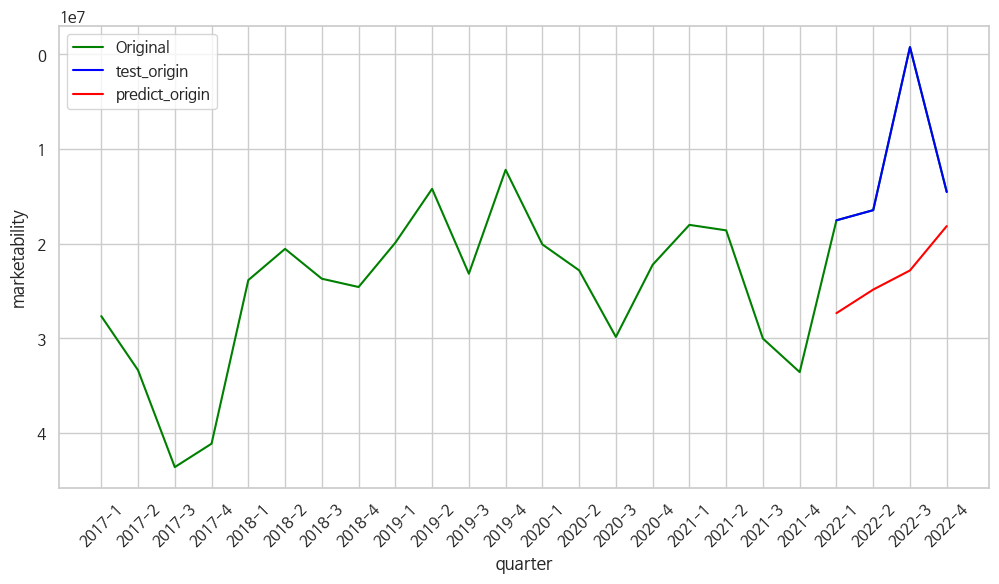

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.134993e+07
std      8.583733e+06
min      3.606157e+06
25%      7.195172e+06
50%      9.099273e+06
75%      1.325404e+07
max      2.359504e+07
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 34ms/step
[[0.46713004]]
--------------------------------------------------------------------------------
예측된 시장성  : -22865478.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_car[['성장성', '분기당_매출_금액', '시장성']]
y = ap_car.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000   901568537 -2.764470e+07
1   1.026763   925697515 -3.335310e+07
2   0.992220   918495141 -4.359292e+07
3   0.889645   817134254 -4.111920e+07
4   1.448103  1183294525 -2.383874e+07
5   1.208600  1430130276 -2.053729e+07
6   1.030175  1473284032 -2.369041e+07
7   0.825311  1215917356 -2.456666e+07
8   0.678339   824804104 -1.988631e+07
9   1.380752  1138849993 -1.419268e+07
10  0.779291   887495626 -2.316269e+07
11  1.305043  1158220243 -1.218366e+07
12  0.669568   775506978 -2.006626e+07
13  1.287769   998673949 -2.280562e+07
14  0.788538   787492836 -2.984190e+07
15  1.161467   914646952 -2.221798e+07
16  1.014860   928238918 -1.800176e+07
17  1.087461  1009423674 -1.858131e+07
18  0.758861   766012136 -3.001409e+07
19  1.166635   893656535 -3.355598e+07
20  0.984134   879477806 -1.752054e+07
21  1.399742  1231041667 -1.644707e+07
22  1.295714  1595078521  7.789677e+05
23  0.861454  1374087340 -1.452405e+07
-------------------------

In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.80426258 1.         1.        ]
 [0.24647128 0.73344573 0.6551191 ]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4411
Epoch 1: val_loss improved from inf to 0.49158, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4411 - val_loss: 0.4916
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4398
Epoch 2: val_loss improved from 0.49158 to 0.49014, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4398 - val_loss: 0.4901
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4385
Epoch 3: val_loss improved from 0.49014 to 0.48870, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.4385 - val_loss: 0.4887
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4372
Epoch 4: val_loss improved from 0.48870 to 0.48727, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.4372 - val_loss: 0.4873
Epoch 5/300
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 624ms/step
[[0.38748765]
 [0.5024146 ]
 [0.5912357 ]
 [0.7958604 ]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.666667,0.387488
2022-2,0.986111,0.502415
2022-3,0.333333,0.591236
2022-4,0.666667,0.795860


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_car의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.666667,0.387488,0.000000,-3.641465,3.641465
2022-2,0.986111,0.502415,4.166667,-2.142419,6.309085
2022-3,0.333333,0.591236,-4.347826,-0.983882,-3.363944
2022-4,0.666667,0.795860,0.000000,1.685136,-1.685136


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


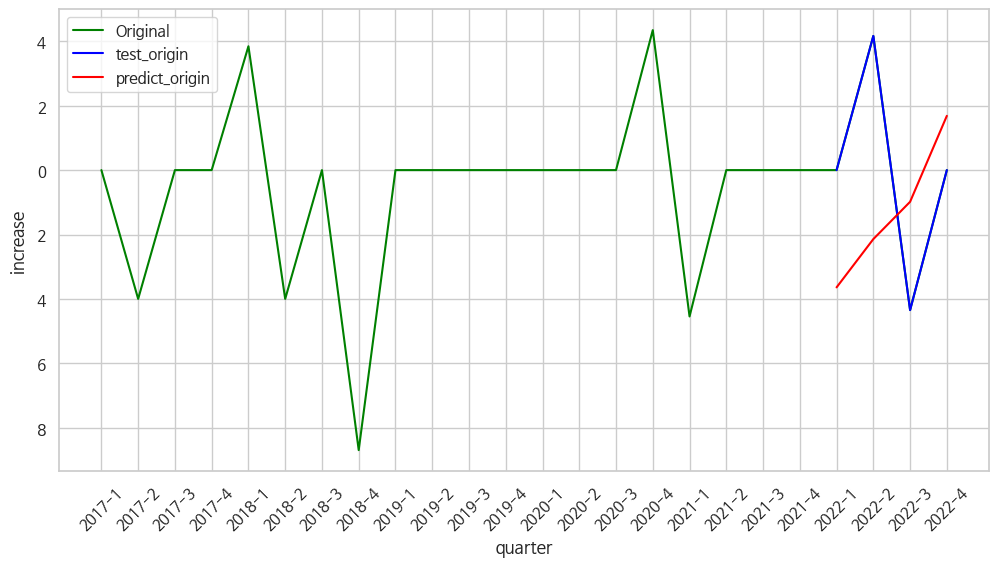

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.225368
std      4.517172
min     -3.363944
25%     -2.104838
50%      0.978165
75%      4.308370
max      6.309085
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 20ms/step
[[0.7784943]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.4586212635040283 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

883815000.0
1.0338497
-22865478.0
1.4586213


In [70]:
ap_car.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-70-bbb74b9f7ca2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_car.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [71]:
ap_car

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,자동차수리,9.015685e+08,1.000000,0.000000,-2.764470e+07
1,2017-2,자동차수리,9.256975e+08,1.026763,-4.000000,-3.335310e+07
2,2017-3,자동차수리,9.184951e+08,0.992220,0.000000,-4.359292e+07
3,2017-4,자동차수리,8.171343e+08,0.889645,0.000000,-4.111920e+07
4,2018-1,자동차수리,1.183295e+09,1.448103,3.846154,-2.383874e+07
5,2018-2,자동차수리,1.430130e+09,1.208600,-4.000000,-2.053729e+07
6,2018-3,자동차수리,1.473284e+09,1.030175,0.000000,-2.369041e+07
7,2018-4,자동차수리,1.215917e+09,0.825311,-8.695652,-2.456666e+07
8,2019-1,자동차수리,8.248041e+08,0.678339,0.000000,-1.988631e+07
9,2019-2,자동차수리,1.138850e+09,1.380752,0.000000,-1.419268e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_car[['성장성', '시장성', '순점포증감률']]
y = ap_car.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.764470e+07  0.000000
1   1.026763 -3.335310e+07 -4.000000
2   0.992220 -4.359292e+07  0.000000
3   0.889645 -4.111920e+07  0.000000
4   1.448103 -2.383874e+07  3.846154
5   1.208600 -2.053729e+07 -4.000000
6   1.030175 -2.369041e+07  0.000000
7   0.825311 -2.456666e+07 -8.695652
8   0.678339 -1.988631e+07  0.000000
9   1.380752 -1.419268e+07  0.000000
10  0.779291 -2.316269e+07  0.000000
11  1.305043 -1.218366e+07  0.000000
12  0.669568 -2.006626e+07  0.000000
13  1.287769 -2.280562e+07  0.000000
14  0.788538 -2.984190e+07  0.000000
15  1.161467 -2.221798e+07  4.347826
16  1.014860 -1.800176e+07 -4.545455
17  1.087461 -1.858131e+07  0.000000
18  0.758861 -3.001409e+07  0.000000
19  1.166635 -3.355598e+07  0.000000
20  0.984134 -1.752054e+07  0.000000
21  1.399742 -1.644707e+07  4.166667
22  1.295714  7.789677e+05 -4.347826
23  0.861454 -1.452405e+07  0.000000
24  1.033850 -2.286548e+07  1.458621
--------------------------------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.24647128 0.6551191  0.66666667]
 [0.46790683 0.46713006 0.7784943 ]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2380
Epoch 1: val_loss improved from inf to 0.04427, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2380 - val_loss: 0.0443
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2370
Epoch 2: val_loss improved from 0.04427 to 0.04379, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2370 - val_loss: 0.0438
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2360
Epoch 3: val_loss improved from 0.04379 to 0.04332, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2360 - val_loss: 0.0433
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2351
Epoch 4: val_loss improved from 0.04332 to 0.04285, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2351 - val_loss: 0.0428
Epoch 5/300
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 632ms/step
[[0.17073461]
 [0.18538934]
 [0.20244506]
 [0.15879902]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.560907,0.170735
2022-3,1.000000,0.185389
2022-4,0.733446,0.202445
2023-1,0.142091,0.158799


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_car의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.560907,0.170735,1.231042e+09,907562432.0,323479235.0
2022-3,1.000000,0.185389,1.595079e+09,919712192.0,675366329.0
2022-4,0.733446,0.202445,1.374087e+09,933852544.0,440234796.0
2023-1,0.142091,0.158799,8.838150e+08,897667072.0,-13852096.0


In [81]:
df_test = df_test.reset_index()

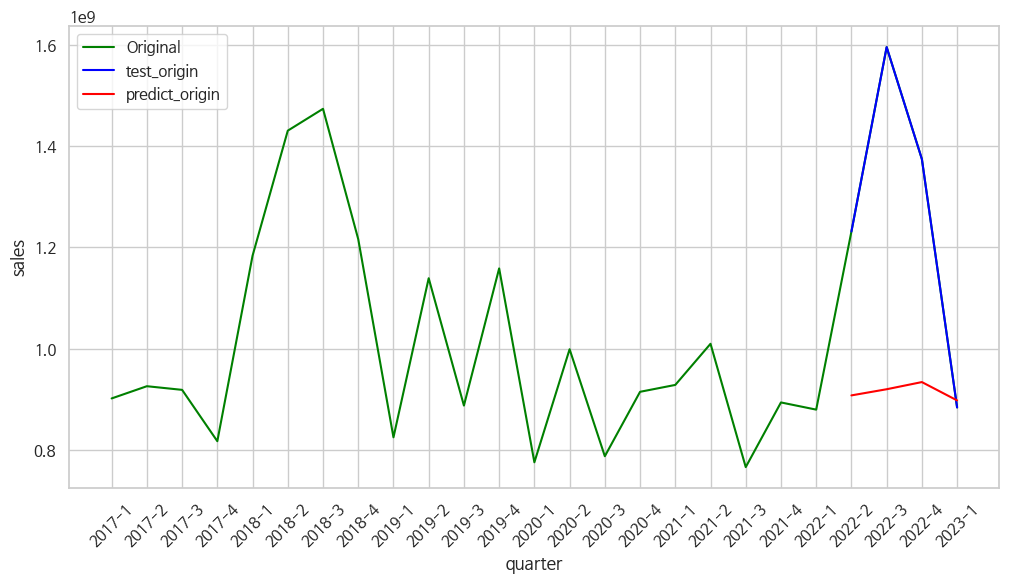

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.563071e+08
std      2.869019e+08
min     -1.385210e+07
25%      2.391464e+08
50%      3.818570e+08
75%      4.990177e+08
max      6.753663e+08
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 20ms/step
[[0.16120708]]
--------------------------------------------------------------------------------
예측된 매출  : 899663488.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_car.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   9.015685e+08 -2.764470e+07  0.000000
1   9.256975e+08 -3.335310e+07 -4.000000
2   9.184951e+08 -4.359292e+07  0.000000
3   8.171343e+08 -4.111920e+07  0.000000
4   1.183295e+09 -2.383874e+07  3.846154
5   1.430130e+09 -2.053729e+07 -4.000000
6   1.473284e+09 -2.369041e+07  0.000000
7   1.215917e+09 -2.456666e+07 -8.695652
8   8.248041e+08 -1.988631e+07  0.000000
9   1.138850e+09 -1.419268e+07  0.000000
10  8.874956e+08 -2.316269e+07  0.000000
11  1.158220e+09 -1.218366e+07  0.000000
12  7.755070e+08 -2.006626e+07  0.000000
13  9.986739e+08 -2.280562e+07  0.000000
14  7.874928e+08 -2.984190e+07  0.000000
15  9.146470e+08 -2.221798e+07  4.347826
16  9.282389e+08 -1.800176e+07 -4.545455
17  1.009424e+09 -1.858131e+07  0.000000
18  7.660121e+08 -3.001409e+07  0.000000
19  8.936565e+08 -3.355598e+07  0.000000
20  8.794778e+08 -1.752054e+07  0.000000
21  1.231042e+09 -1.644707e+07  4.166667
22  1.595079e+09  7.789677e+05 -4.347826
23  1.374087e+09

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.73344573 0.6551191  0.66666667]
 [0.14209096 0.46713006 0.7784943 ]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3385
Epoch 1: val_loss improved from inf to 0.28981, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3385 - val_loss: 0.2898
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3374
Epoch 2: val_loss improved from 0.28981 to 0.28863, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.3374 - val_loss: 0.2886
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3363
Epoch 3: val_loss improved from 0.28863 to 0.28745, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3363 - val_loss: 0.2875
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3353
Epoch 4: val_loss improved from 0.28745 to 0.28628, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.3353 - val_loss: 0.2863
Epoch 5/300
1/1 [=================

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 677ms/step
[[0.41626665]
 [0.476959  ]
 [0.52762854]
 [0.45134193]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.937882,0.416267
2022-3,0.804263,0.476959
2022-4,0.246471,0.527629
2023-1,0.467907,0.451342


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 3].values       # 성장성이 ap_car의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.937882,0.416267,1.399742,0.993646,0.406096
2022-3,0.804263,0.476959,1.295714,1.040897,0.254817
2022-4,0.246471,0.527629,0.861454,1.080345,-0.218891
2023-1,0.467907,0.451342,1.033850,1.020953,0.012896


In [94]:
df_test = df_test.reset_index()

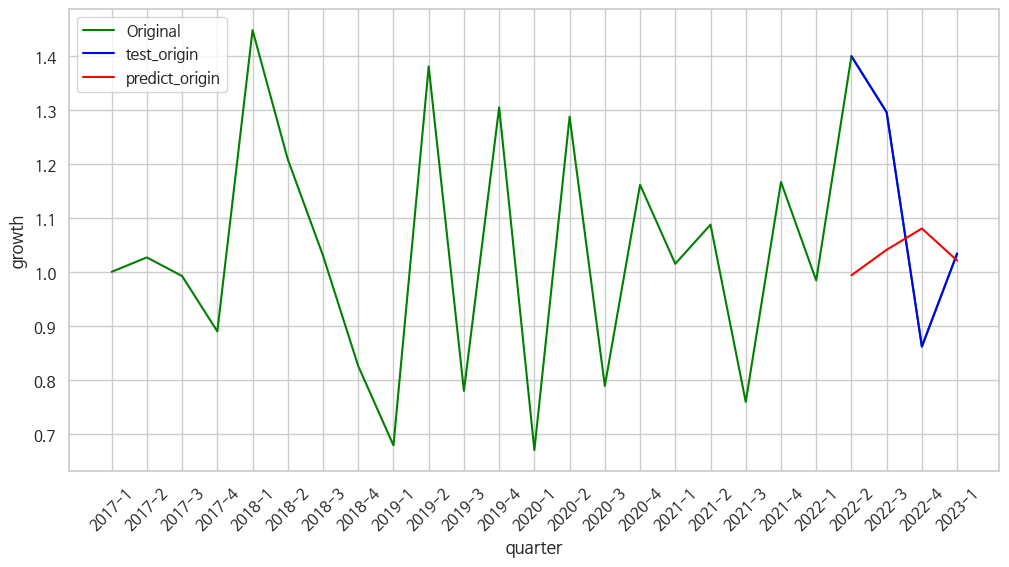

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.113730
std      0.274583
min     -0.218891
25%     -0.045050
50%      0.133857
75%      0.292637
max      0.406096
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.4855804]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0476092100143433 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_car.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   9.015685e+08  1.000000  0.000000
1   9.256975e+08  1.026763 -4.000000
2   9.184951e+08  0.992220  0.000000
3   8.171343e+08  0.889645  0.000000
4   1.183295e+09  1.448103  3.846154
5   1.430130e+09  1.208600 -4.000000
6   1.473284e+09  1.030175  0.000000
7   1.215917e+09  0.825311 -8.695652
8   8.248041e+08  0.678339  0.000000
9   1.138850e+09  1.380752  0.000000
10  8.874956e+08  0.779291  0.000000
11  1.158220e+09  1.305043  0.000000
12  7.755070e+08  0.669568  0.000000
13  9.986739e+08  1.287769  0.000000
14  7.874928e+08  0.788538  0.000000
15  9.146470e+08  1.161467  4.347826
16  9.282389e+08  1.014860 -4.545455
17  1.009424e+09  1.087461  0.000000
18  7.660121e+08  0.758861  0.000000
19  8.936565e+08  1.166635  0.000000
20  8.794778e+08  0.984134  0.000000
21  1.231042e+09  1.399742  4.166667
22  1.595079e+09  1.295714 -4.347826
23  1.374087e+09  0.861454  0.000000
24  8.838150e+08  1.033850  1.458621
--------------------------------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.73344573 0.24647128 0.66666667]
 [0.14209096 0.46790683 0.7784943 ]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2584
Epoch 1: val_loss improved from inf to 0.23263, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2584 - val_loss: 0.2326
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2573
Epoch 2: val_loss improved from 0.23263 to 0.23154, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.2573 - val_loss: 0.2315
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2562
Epoch 3: val_loss improved from 0.23154 to 0.23046, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2562 - val_loss: 0.2305
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2551
Epoch 4: val_loss improved from 0.23046 to 0.22939, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2551 - val_loss: 0.2294
Epoch 5/300
1/1 [=================

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.41556302]
 [0.4724898 ]
 [0.58213234]
 [0.49924916]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.611780,0.415563
2022-3,1.000000,0.472490
2022-4,0.655119,0.582132
2023-1,0.467130,0.499249


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 5].values       # 시장성이 ap_car의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.611780,0.415563,-1.644707e+07,-25153604.0,8.706538e+06
2022-3,1.000000,0.472490,7.789677e+05,-22627656.0,2.340662e+07
2022-4,0.655119,0.582132,-1.452405e+07,-17762608.0,3.238559e+06
2023-1,0.467130,0.499249,-2.286548e+07,-21440292.0,-1.425186e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


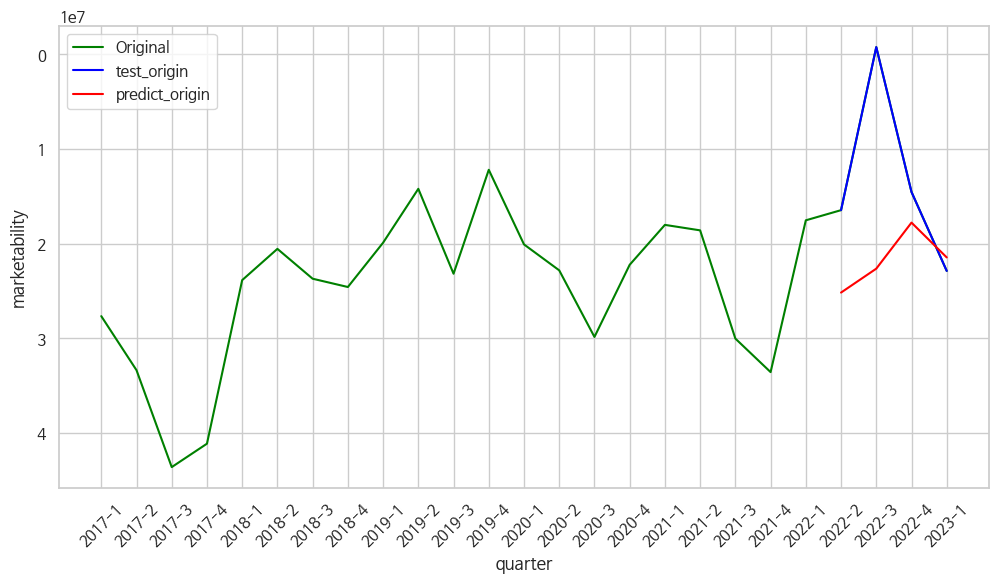

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     8.481634e+06
std      1.077715e+07
min     -1.425186e+06
25%      2.072623e+06
50%      5.972549e+06
75%      1.238156e+07
max      2.340662e+07
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.4804777]]
--------------------------------------------------------------------------------
예측된 시장성  : -22273220.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '성장성', '시장성']]
y = ap_car.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   9.015685e+08  1.000000 -2.764470e+07
1   9.256975e+08  1.026763 -3.335310e+07
2   9.184951e+08  0.992220 -4.359292e+07
3   8.171343e+08  0.889645 -4.111920e+07
4   1.183295e+09  1.448103 -2.383874e+07
5   1.430130e+09  1.208600 -2.053729e+07
6   1.473284e+09  1.030175 -2.369041e+07
7   1.215917e+09  0.825311 -2.456666e+07
8   8.248041e+08  0.678339 -1.988631e+07
9   1.138850e+09  1.380752 -1.419268e+07
10  8.874956e+08  0.779291 -2.316269e+07
11  1.158220e+09  1.305043 -1.218366e+07
12  7.755070e+08  0.669568 -2.006626e+07
13  9.986739e+08  1.287769 -2.280562e+07
14  7.874928e+08  0.788538 -2.984190e+07
15  9.146470e+08  1.161467 -2.221798e+07
16  9.282389e+08  1.014860 -1.800176e+07
17  1.009424e+09  1.087461 -1.858131e+07
18  7.660121e+08  0.758861 -3.001409e+07
19  8.936565e+08  1.166635 -3.355598e+07
20  8.794778e+08  0.984134 -1.752054e+07
21  1.231042e+09  1.399742 -1.644707e+07
22  1.595079e+09  1.295714  7.789677e+05
23  1.374087e+09

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.73344573 0.24647128 0.6551191 ]
 [0.14209096 0.46790683 0.46713006]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4488
Epoch 1: val_loss improved from inf to 0.50166, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4488 - val_loss: 0.5017
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4475
Epoch 2: val_loss improved from 0.50166 to 0.50023, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.4475 - val_loss: 0.5002
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4462
Epoch 3: val_loss improved from 0.50023 to 0.49880, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.4462 - val_loss: 0.4988
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4449
Epoch 4: val_loss improved from 0.49880 to 0.49738, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.4449 - val_loss: 0.4974
Epoch 5/300
1/1 [=================

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 652ms/step
[[0.47104594]
 [0.578823  ]
 [0.7947082 ]
 [0.832003  ]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.986111,0.471046
2022-3,0.333333,0.578823
2022-4,0.666667,0.794708
2023-1,0.778494,0.832003


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_car의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.986111,0.471046,4.166667,-2.551575,6.718241
2022-3,0.333333,0.578823,-4.347826,-1.145787,-3.202039
2022-4,0.666667,0.794708,0.000000,1.670107,-1.670107
2023-1,0.778494,0.832003,1.458621,2.156561,-0.697939


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


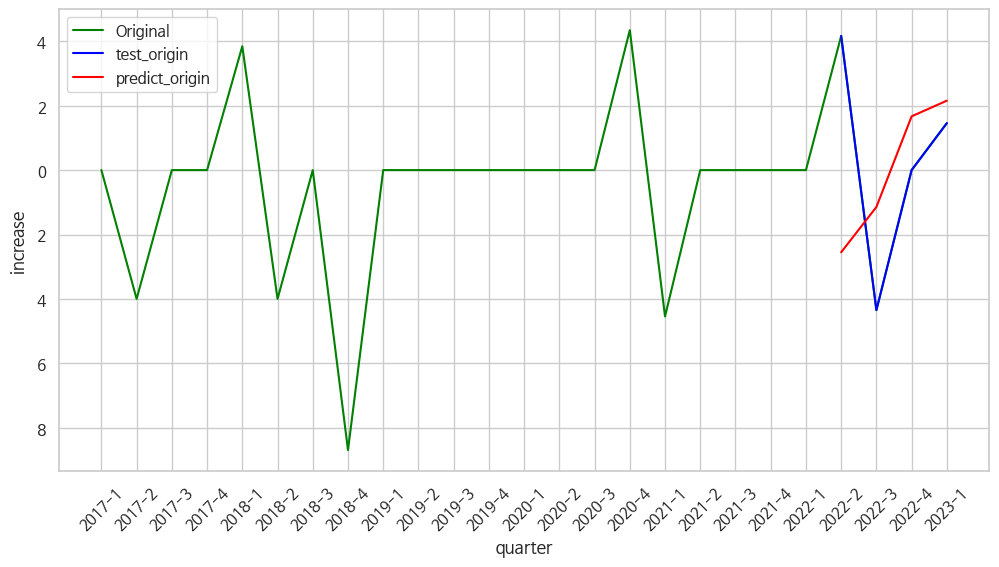

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.287039
std      4.409635
min     -3.202039
25%     -2.053090
50%     -1.184023
75%      1.156106
max      6.718241
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.57865685]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.1479541063308716 


### 추가


In [122]:
ap_car.loc[25] = ['2023-2', '자동차수리수리리', sales, growth, increase, marketability]

<ipython-input-122-287ab36f0d8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_car.loc[25] = ['2023-2', '자동차수리수리리', sales, growth, increase, marketability]


In [123]:
ap_car

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,자동차수리,9.015685e+08,1.000000,0.000000,-2.764470e+07
1,2017-2,자동차수리,9.256975e+08,1.026763,-4.000000,-3.335310e+07
2,2017-3,자동차수리,9.184951e+08,0.992220,0.000000,-4.359292e+07
3,2017-4,자동차수리,8.171343e+08,0.889645,0.000000,-4.111920e+07
4,2018-1,자동차수리,1.183295e+09,1.448103,3.846154,-2.383874e+07
5,2018-2,자동차수리,1.430130e+09,1.208600,-4.000000,-2.053729e+07
6,2018-3,자동차수리,1.473284e+09,1.030175,0.000000,-2.369041e+07
7,2018-4,자동차수리,1.215917e+09,0.825311,-8.695652,-2.456666e+07
8,2019-1,자동차수리,8.248041e+08,0.678339,0.000000,-1.988631e+07
9,2019-2,자동차수리,1.138850e+09,1.380752,0.000000,-1.419268e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_car[['성장성', '시장성', '순점포증감률']]
y = ap_car.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.764470e+07  0.000000
1   1.026763 -3.335310e+07 -4.000000
2   0.992220 -4.359292e+07  0.000000
3   0.889645 -4.111920e+07  0.000000
4   1.448103 -2.383874e+07  3.846154
5   1.208600 -2.053729e+07 -4.000000
6   1.030175 -2.369041e+07  0.000000
7   0.825311 -2.456666e+07 -8.695652
8   0.678339 -1.988631e+07  0.000000
9   1.380752 -1.419268e+07  0.000000
10  0.779291 -2.316269e+07  0.000000
11  1.305043 -1.218366e+07  0.000000
12  0.669568 -2.006626e+07  0.000000
13  1.287769 -2.280562e+07  0.000000
14  0.788538 -2.984190e+07  0.000000
15  1.161467 -2.221798e+07  4.347826
16  1.014860 -1.800176e+07 -4.545455
17  1.087461 -1.858131e+07  0.000000
18  0.758861 -3.001409e+07  0.000000
19  1.166635 -3.355598e+07  0.000000
20  0.984134 -1.752054e+07  0.000000
21  1.399742 -1.644707e+07  4.166667
22  1.295714  7.789677e+05 -4.347826
23  0.861454 -1.452405e+07  0.000000
24  1.033850 -2.286548e+07  1.458621
25  1.047609 -2.227322e+07 -1.147954
-

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.46790683 0.46713006 0.7784943 ]
 [0.4855804  0.48047765 0.57865685]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2265
Epoch 1: val_loss improved from inf to 0.07472, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2265 - val_loss: 0.0747
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2255
Epoch 2: val_loss improved from 0.07472 to 0.07417, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2255 - val_loss: 0.0742
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2245
Epoch 3: val_loss improved from 0.07417 to 0.07361, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2245 - val_loss: 0.0736
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2235
Epoch 4: val_loss improved from 0.07361 to 0.07306, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2235 - val_loss: 0.0731
Epoch 5/300
1/1 [=================

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 634ms/step
[[0.22819859]
 [0.25186774]
 [0.19759929]
 [0.1980309 ]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,1.000000,0.228199
2022-4,0.733446,0.251868
2023-1,0.142091,0.197599
2023-2,0.161207,0.198031


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_car의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,1.000000,0.228199,1.595079e+09,955203904.0,639874617.0
2022-4,0.733446,0.251868,1.374087e+09,974827200.0,399260140.0
2023-1,0.142091,0.197599,8.838150e+08,929835008.0,-46020032.0
2023-2,0.161207,0.198031,8.996635e+08,930192896.0,-30529408.0


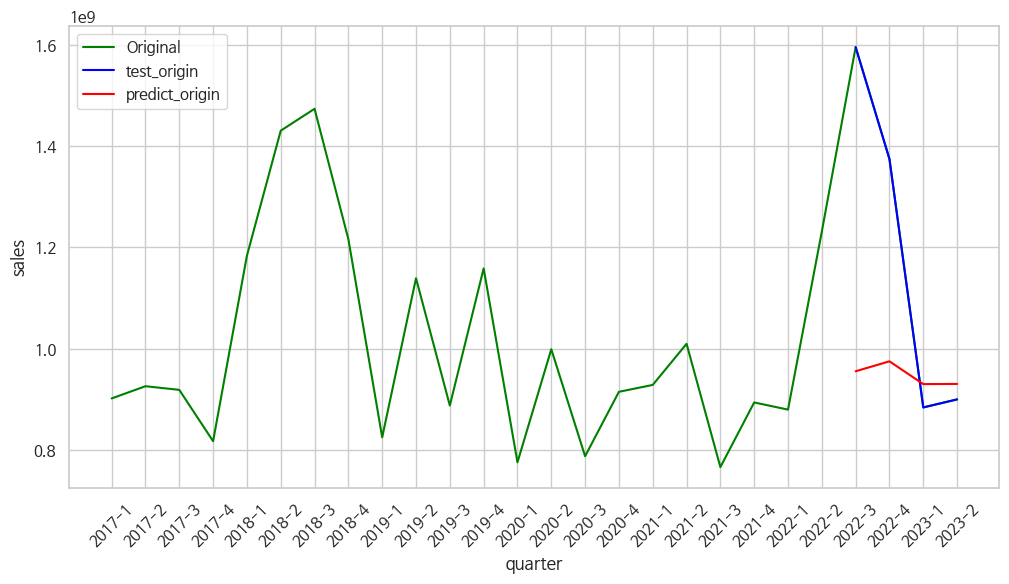

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.406463e+08
std      3.367766e+08
min     -4.602003e+07
25%     -3.440206e+07
50%      1.843654e+08
75%      4.594138e+08
max      6.398746e+08
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 20ms/step
[[0.20853433]]
--------------------------------------------------------------------------------
예측된 매출  : 938900928.0 


### 성장성

In [136]:
X = ap_car[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_car.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   9.015685e+08 -2.764470e+07  0.000000
1   9.256975e+08 -3.335310e+07 -4.000000
2   9.184951e+08 -4.359292e+07  0.000000
3   8.171343e+08 -4.111920e+07  0.000000
4   1.183295e+09 -2.383874e+07  3.846154
5   1.430130e+09 -2.053729e+07 -4.000000
6   1.473284e+09 -2.369041e+07  0.000000
7   1.215917e+09 -2.456666e+07 -8.695652
8   8.248041e+08 -1.988631e+07  0.000000
9   1.138850e+09 -1.419268e+07  0.000000
10  8.874956e+08 -2.316269e+07  0.000000
11  1.158220e+09 -1.218366e+07  0.000000
12  7.755070e+08 -2.006626e+07  0.000000
13  9.986739e+08 -2.280562e+07  0.000000
14  7.874928e+08 -2.984190e+07  0.000000
15  9.146470e+08 -2.221798e+07  4.347826
16  9.282389e+08 -1.800176e+07 -4.545455
17  1.009424e+09 -1.858131e+07  0.000000
18  7.660121e+08 -3.001409e+07  0.000000
19  8.936565e+08 -3.355598e+07  0.000000
20  8.794778e+08 -1.752054e+07  0.000000
21  1.231042e+09 -1.644707e+07  4.166667
22  1.595079e+09  7.789677e+05 -4.347826
23  1.374087e+09

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.14209096 0.46713006 0.7784943 ]
 [0.16120706 0.48047765 0.57865685]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3674
Epoch 1: val_loss improved from inf to 0.31949, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.3674 - val_loss: 0.3195
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3662
Epoch 2: val_loss improved from 0.31949 to 0.31830, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.3662 - val_loss: 0.3183
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3651
Epoch 3: val_loss improved from 0.31830 to 0.31712, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3651 - val_loss: 0.3171
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3639
Epoch 4: val_loss improved from 0.31712 to 0.31594, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.3639 - val_loss: 0.3159
Epoch 5/300
1/1 [=================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 613ms/step
[[0.51324826]
 [0.5748092 ]
 [0.4978998 ]
 [0.5240241 ]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.804263,0.513248
2022-4,0.246471,0.574809
2023-1,0.467907,0.497900
2023-2,0.485580,0.524024


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 3].values       # 성장성이 ap_car의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.804263,0.513248,1.295714,1.069150,0.226565
2022-4,0.246471,0.574809,0.861454,1.117077,-0.255623
2023-1,0.467907,0.497900,1.033850,1.057200,-0.023351
2023-2,0.485580,0.524024,1.047609,1.077539,-0.029930


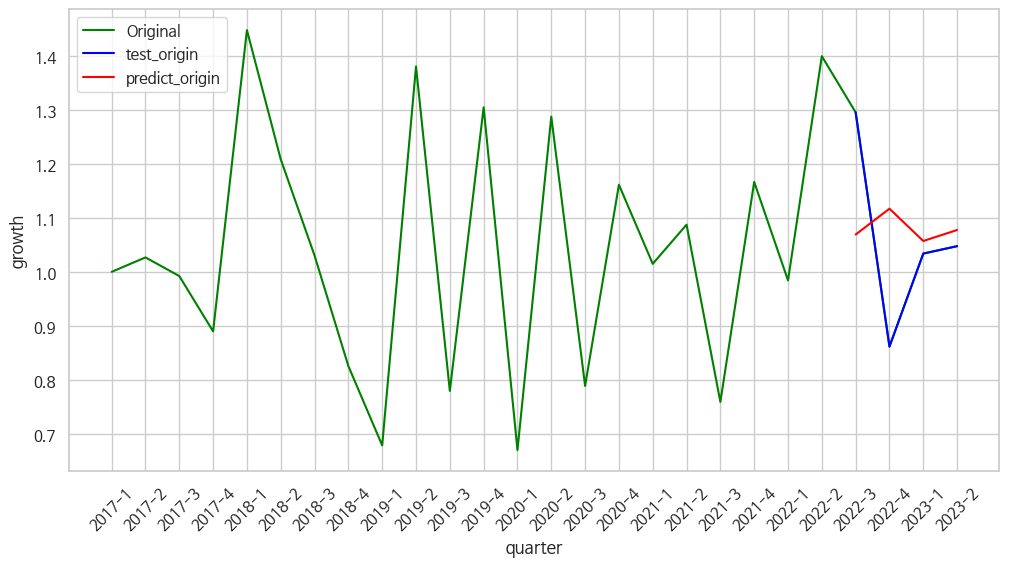

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.020585
std      0.196995
min     -0.255623
25%     -0.086353
50%     -0.026640
75%      0.039128
max      0.226565
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 19ms/step
[[0.46749824]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0335315465927124 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_car.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   9.015685e+08  1.000000  0.000000
1   9.256975e+08  1.026763 -4.000000
2   9.184951e+08  0.992220  0.000000
3   8.171343e+08  0.889645  0.000000
4   1.183295e+09  1.448103  3.846154
5   1.430130e+09  1.208600 -4.000000
6   1.473284e+09  1.030175  0.000000
7   1.215917e+09  0.825311 -8.695652
8   8.248041e+08  0.678339  0.000000
9   1.138850e+09  1.380752  0.000000
10  8.874956e+08  0.779291  0.000000
11  1.158220e+09  1.305043  0.000000
12  7.755070e+08  0.669568  0.000000
13  9.986739e+08  1.287769  0.000000
14  7.874928e+08  0.788538  0.000000
15  9.146470e+08  1.161467  4.347826
16  9.282389e+08  1.014860 -4.545455
17  1.009424e+09  1.087461  0.000000
18  7.660121e+08  0.758861  0.000000
19  8.936565e+08  1.166635  0.000000
20  8.794778e+08  0.984134  0.000000
21  1.231042e+09  1.399742  4.166667
22  1.595079e+09  1.295714 -4.347826
23  1.374087e+09  0.861454  0.000000
24  8.838150e+08  1.033850  1.458621
25  8.996635e+08  1.047609 -1.147954
-

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.14209096 0.46790683 0.7784943 ]
 [0.16120706 0.4855804  0.57865685]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2574
Epoch 1: val_loss improved from inf to 0.25324, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2574 - val_loss: 0.2532
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2562
Epoch 2: val_loss improved from 0.25324 to 0.25212, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2562 - val_loss: 0.2521
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2551
Epoch 3: val_loss improved from 0.25212 to 0.25100, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2551 - val_loss: 0.2510
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2540
Epoch 4: val_loss improved from 0.25100 to 0.24988, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2540 - val_loss: 0.2499
Epoch 5/300
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 673ms/step
[[0.47477716]
 [0.58403873]
 [0.4981151 ]
 [0.47954175]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,1.000000,0.474777
2022-4,0.655119,0.584039
2023-1,0.467130,0.498115
2023-2,0.480478,0.479542


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 5].values       # 시장성이 ap_car의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,1.000000,0.474777,7.789677e+05,-22526162.0,2.330513e+07
2022-4,0.655119,0.584039,-1.452405e+07,-17678018.0,3.153969e+06
2023-1,0.467130,0.498115,-2.286548e+07,-21490612.0,-1.374866e+06
2023-2,0.480478,0.479542,-2.227322e+07,-22314748.0,4.152800e+04


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


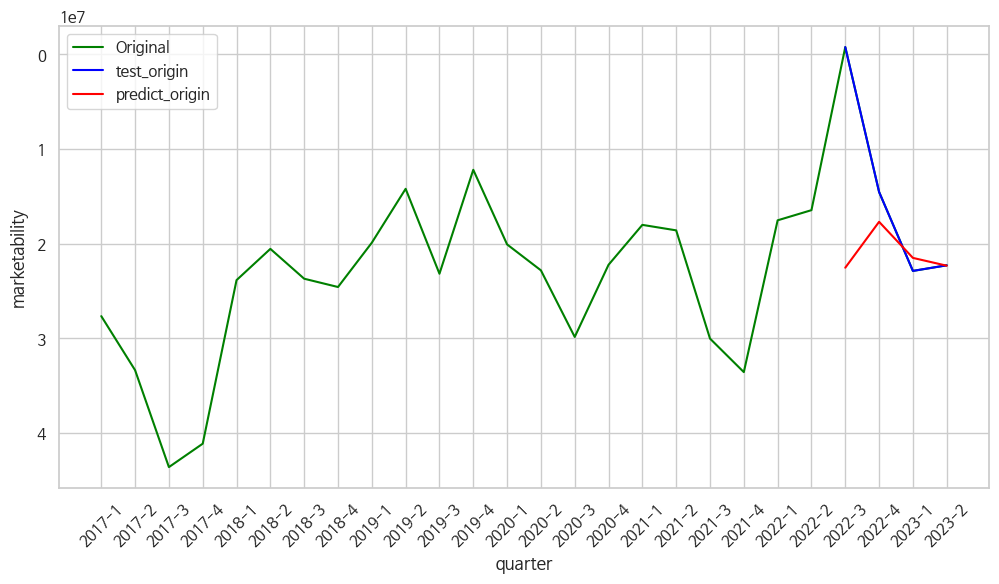

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     6.281440e+06
std      1.150569e+07
min     -1.374866e+06
25%     -3.125705e+05
50%      1.597748e+06
75%      8.191759e+06
max      2.330513e+07
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.42383713]]
--------------------------------------------------------------------------------
예측된 시장성  : -24786468.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '성장성', '시장성']]
y = ap_car.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   9.015685e+08  1.000000 -2.764470e+07
1   9.256975e+08  1.026763 -3.335310e+07
2   9.184951e+08  0.992220 -4.359292e+07
3   8.171343e+08  0.889645 -4.111920e+07
4   1.183295e+09  1.448103 -2.383874e+07
5   1.430130e+09  1.208600 -2.053729e+07
6   1.473284e+09  1.030175 -2.369041e+07
7   1.215917e+09  0.825311 -2.456666e+07
8   8.248041e+08  0.678339 -1.988631e+07
9   1.138850e+09  1.380752 -1.419268e+07
10  8.874956e+08  0.779291 -2.316269e+07
11  1.158220e+09  1.305043 -1.218366e+07
12  7.755070e+08  0.669568 -2.006626e+07
13  9.986739e+08  1.287769 -2.280562e+07
14  7.874928e+08  0.788538 -2.984190e+07
15  9.146470e+08  1.161467 -2.221798e+07
16  9.282389e+08  1.014860 -1.800176e+07
17  1.009424e+09  1.087461 -1.858131e+07
18  7.660121e+08  0.758861 -3.001409e+07
19  8.936565e+08  1.166635 -3.355598e+07
20  8.794778e+08  0.984134 -1.752054e+07
21  1.231042e+09  1.399742 -1.644707e+07
22  1.595079e+09  1.295714  7.789677e+05
23  1.374087e+09

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.14209096 0.46790683 0.46713006]
 [0.16120706 0.4855804  0.48047765]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4516
Epoch 1: val_loss improved from inf to 0.56963, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4516 - val_loss: 0.5696
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4502
Epoch 2: val_loss improved from 0.56963 to 0.56814, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.4502 - val_loss: 0.5681
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4489
Epoch 3: val_loss improved from 0.56814 to 0.56666, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.4489 - val_loss: 0.5667
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4475
Epoch 4: val_loss improved from 0.56666 to 0.56518, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.4475 - val_loss: 0.5652
Epoch 5/300
1/1 [=================

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 649ms/step
[[0.5813424 ]
 [0.80091166]
 [0.8426055 ]
 [0.5839743 ]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.333333,0.581342
2022-4,0.666667,0.800912
2023-1,0.778494,0.842605
2023-2,0.578657,0.583974


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_car의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.333333,0.581342,-4.347826,-1.112925,-3.234901
2022-4,0.666667,0.800912,0.000000,1.751022,-1.751022
2023-1,0.778494,0.842605,1.458621,2.294854,-0.836233
2023-2,0.578657,0.583974,-1.147954,-1.078596,-0.069358


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


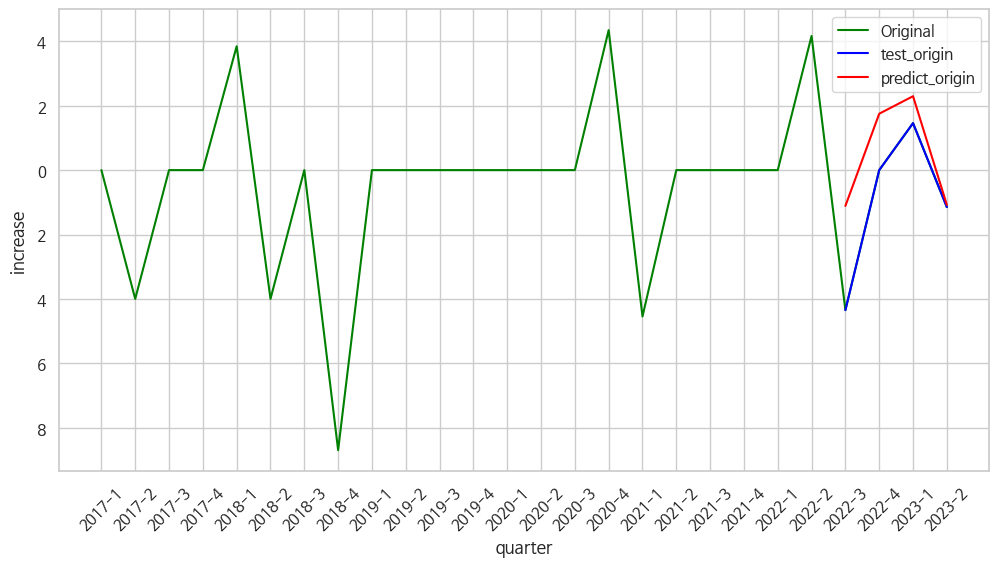

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.472878
std      1.361038
min     -3.234901
25%     -2.121991
50%     -1.293627
75%     -0.644514
max     -0.069358
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.49350968]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.2585694789886475 


### 추가

In [172]:
ap_car.loc[26] = ['2023-3', '자동차수리', sales, growth, increase, marketability]

<ipython-input-172-135323ab1152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_car.loc[26] = ['2023-3', '자동차수리', sales, growth, increase, marketability]


In [173]:
ap_car

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,자동차수리,9.015685e+08,1.000000,0.000000,-2.764470e+07
1,2017-2,자동차수리,9.256975e+08,1.026763,-4.000000,-3.335310e+07
2,2017-3,자동차수리,9.184951e+08,0.992220,0.000000,-4.359292e+07
3,2017-4,자동차수리,8.171343e+08,0.889645,0.000000,-4.111920e+07
4,2018-1,자동차수리,1.183295e+09,1.448103,3.846154,-2.383874e+07
5,2018-2,자동차수리,1.430130e+09,1.208600,-4.000000,-2.053729e+07
6,2018-3,자동차수리,1.473284e+09,1.030175,0.000000,-2.369041e+07
7,2018-4,자동차수리,1.215917e+09,0.825311,-8.695652,-2.456666e+07
8,2019-1,자동차수리,8.248041e+08,0.678339,0.000000,-1.988631e+07
9,2019-2,자동차수리,1.138850e+09,1.380752,0.000000,-1.419268e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_car[['성장성', '시장성', '순점포증감률']]
y = ap_car.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.764470e+07  0.000000
1   1.026763 -3.335310e+07 -4.000000
2   0.992220 -4.359292e+07  0.000000
3   0.889645 -4.111920e+07  0.000000
4   1.448103 -2.383874e+07  3.846154
5   1.208600 -2.053729e+07 -4.000000
6   1.030175 -2.369041e+07  0.000000
7   0.825311 -2.456666e+07 -8.695652
8   0.678339 -1.988631e+07  0.000000
9   1.380752 -1.419268e+07  0.000000
10  0.779291 -2.316269e+07  0.000000
11  1.305043 -1.218366e+07  0.000000
12  0.669568 -2.006626e+07  0.000000
13  1.287769 -2.280562e+07  0.000000
14  0.788538 -2.984190e+07  0.000000
15  1.161467 -2.221798e+07  4.347826
16  1.014860 -1.800176e+07 -4.545455
17  1.087461 -1.858131e+07  0.000000
18  0.758861 -3.001409e+07  0.000000
19  1.166635 -3.355598e+07  0.000000
20  0.984134 -1.752054e+07  0.000000
21  1.399742 -1.644707e+07  4.166667
22  1.295714  7.789677e+05 -4.347826
23  0.861454 -1.452405e+07  0.000000
24  1.033850 -2.286548e+07  1.458621
25  1.047609 -2.227322e+07 -1.147954
2

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.4855804  0.48047765 0.57865685]
 [0.46749816 0.4238371  0.49350967]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2265
Epoch 1: val_loss improved from inf to 0.18513, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2265 - val_loss: 0.1851
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2255
Epoch 2: val_loss improved from 0.18513 to 0.18430, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2255 - val_loss: 0.1843
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2245
Epoch 3: val_loss improved from 0.18430 to 0.18348, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2245 - val_loss: 0.1835
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2235
Epoch 4: val_loss improved from 0.18348 to 0.18266, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2235 - val_loss: 0.1827
Epoch 5/300
1/1 [=================

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 629ms/step
[[0.39118016]
 [0.30271712]
 [0.29682377]
 [0.31405222]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.733446,0.391180
2023-1,0.142091,0.302717
2023-2,0.161207,0.296824
2023-3,0.208534,0.314052


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_car의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.733446,0.391180,1.374087e+09,1.090326e+09,283760940.0
2023-1,0.142091,0.302717,8.838150e+08,1.016985e+09,-133169792.0
2023-2,0.161207,0.296824,8.996635e+08,1.012099e+09,-112435264.0
2023-3,0.208534,0.314052,9.389009e+08,1.026382e+09,-87481280.0


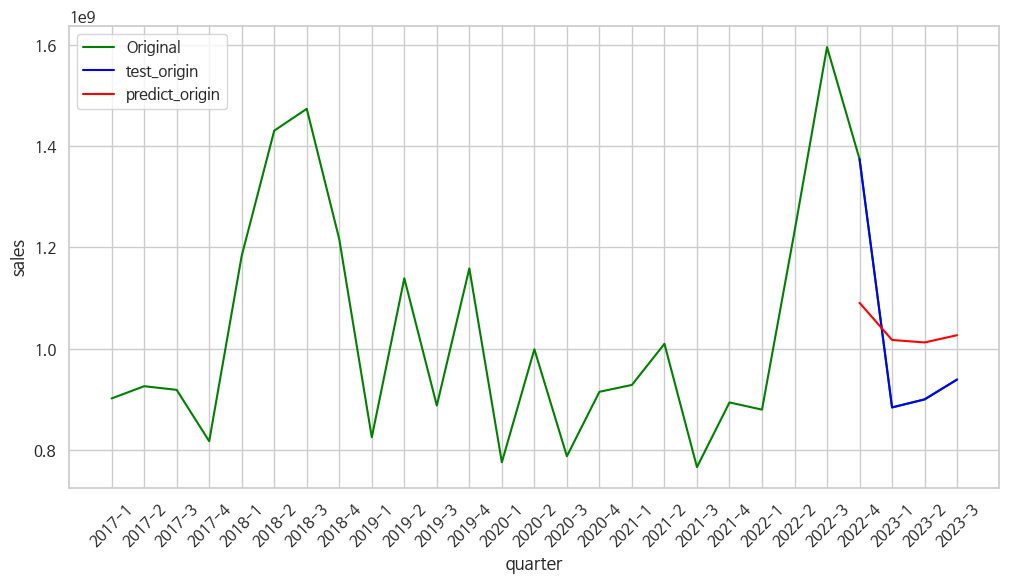

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.233135e+07
std      1.982766e+08
min     -1.331698e+08
25%     -1.176189e+08
50%     -9.995827e+07
75%      5.329275e+06
max      2.837609e+08
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.2861502]]
--------------------------------------------------------------------------------
예측된 매출  : 1003249600.0 


### 성장성

In [186]:
X = ap_car[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_car.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   9.015685e+08 -2.764470e+07  0.000000
1   9.256975e+08 -3.335310e+07 -4.000000
2   9.184951e+08 -4.359292e+07  0.000000
3   8.171343e+08 -4.111920e+07  0.000000
4   1.183295e+09 -2.383874e+07  3.846154
5   1.430130e+09 -2.053729e+07 -4.000000
6   1.473284e+09 -2.369041e+07  0.000000
7   1.215917e+09 -2.456666e+07 -8.695652
8   8.248041e+08 -1.988631e+07  0.000000
9   1.138850e+09 -1.419268e+07  0.000000
10  8.874956e+08 -2.316269e+07  0.000000
11  1.158220e+09 -1.218366e+07  0.000000
12  7.755070e+08 -2.006626e+07  0.000000
13  9.986739e+08 -2.280562e+07  0.000000
14  7.874928e+08 -2.984190e+07  0.000000
15  9.146470e+08 -2.221798e+07  4.347826
16  9.282389e+08 -1.800176e+07 -4.545455
17  1.009424e+09 -1.858131e+07  0.000000
18  7.660121e+08 -3.001409e+07  0.000000
19  8.936565e+08 -3.355598e+07  0.000000
20  8.794778e+08 -1.752054e+07  0.000000
21  1.231042e+09 -1.644707e+07  4.166667
22  1.595079e+09  7.789677e+05 -4.347826
23  1.374087e+09

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.16120706 0.48047765 0.57865685]
 [0.20853432 0.4238371  0.49350967]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3674
Epoch 1: val_loss improved from inf to 0.36168, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3674 - val_loss: 0.3617
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3662
Epoch 2: val_loss improved from 0.36168 to 0.36038, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.3662 - val_loss: 0.3604
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3651
Epoch 3: val_loss improved from 0.36038 to 0.35908, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.3651 - val_loss: 0.3591
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3639
Epoch 4: val_loss improved from 0.35908 to 0.35778, saving model to stock_model.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.3639 - val_loss: 0.3578
Epoch 5/300
1/1 [==============

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 772ms/step
[[0.5748092 ]
 [0.4978998 ]
 [0.5240241 ]
 [0.46749818]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.246471,0.574809
2023-1,0.467907,0.497900
2023-2,0.485580,0.524024
2023-3,0.467498,0.467498


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 3].values       # 성장성이 ap_car의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.246471,0.574809,0.861454,1.117077,-0.255623
2023-1,0.467907,0.497900,1.033850,1.057200,-0.023351
2023-2,0.485580,0.524024,1.047609,1.077539,-0.029930
2023-3,0.467498,0.467498,1.033532,1.033532,0.000000


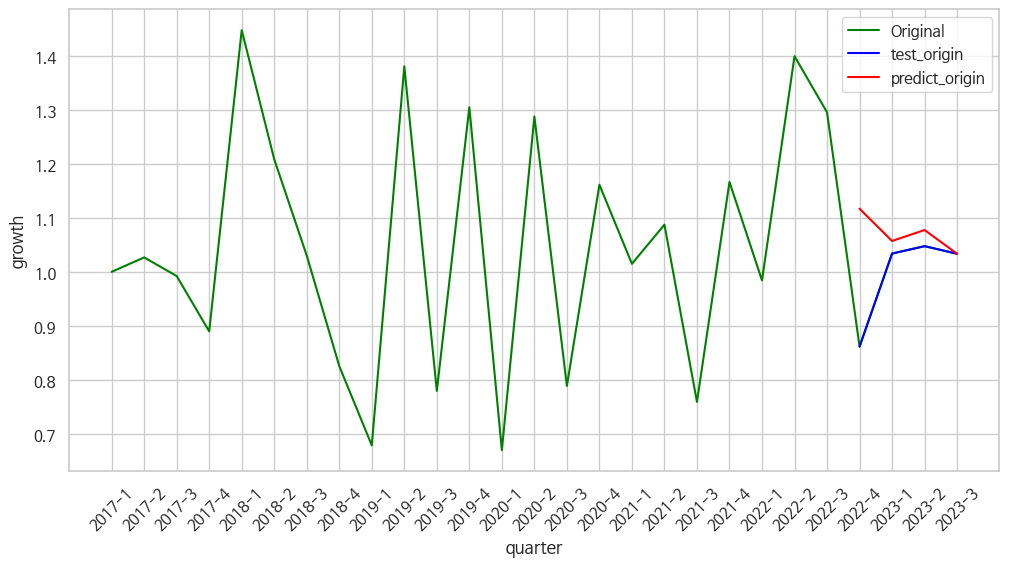

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.077226
std      0.119623
min     -0.255623
25%     -0.086353
50%     -0.026640
75%     -0.017513
max      0.000000
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 31ms/step
[[0.4142425]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9920701384544373 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_car.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   9.015685e+08  1.000000  0.000000
1   9.256975e+08  1.026763 -4.000000
2   9.184951e+08  0.992220  0.000000
3   8.171343e+08  0.889645  0.000000
4   1.183295e+09  1.448103  3.846154
5   1.430130e+09  1.208600 -4.000000
6   1.473284e+09  1.030175  0.000000
7   1.215917e+09  0.825311 -8.695652
8   8.248041e+08  0.678339  0.000000
9   1.138850e+09  1.380752  0.000000
10  8.874956e+08  0.779291  0.000000
11  1.158220e+09  1.305043  0.000000
12  7.755070e+08  0.669568  0.000000
13  9.986739e+08  1.287769  0.000000
14  7.874928e+08  0.788538  0.000000
15  9.146470e+08  1.161467  4.347826
16  9.282389e+08  1.014860 -4.545455
17  1.009424e+09  1.087461  0.000000
18  7.660121e+08  0.758861  0.000000
19  8.936565e+08  1.166635  0.000000
20  8.794778e+08  0.984134  0.000000
21  1.231042e+09  1.399742  4.166667
22  1.595079e+09  1.295714 -4.347826
23  1.374087e+09  0.861454  0.000000
24  8.838150e+08  1.033850  1.458621
25  8.996635e+08  1.047609 -1.147954
2

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.16120706 0.4855804  0.57865685]
 [0.20853432 0.46749816 0.49350967]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2574
Epoch 1: val_loss improved from inf to 0.34358, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2574 - val_loss: 0.3436
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2562
Epoch 2: val_loss improved from 0.34358 to 0.34227, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2562 - val_loss: 0.3423
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2551
Epoch 3: val_loss improved from 0.34227 to 0.34097, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2551 - val_loss: 0.3410
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2540
Epoch 4: val_loss improved from 0.34097 to 0.33967, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2540 - val_loss: 0.3397
Epoch 5/300
1/1 [=================

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 632ms/step
[[0.58403873]
 [0.4981151 ]
 [0.47954175]
 [0.42383713]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.655119,0.584039
2023-1,0.467130,0.498115
2023-2,0.480478,0.479542
2023-3,0.423837,0.423837


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 5].values       # 시장성이 ap_car의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.655119,0.584039,-1.452405e+07,-17678018.0,3.153969e+06
2023-1,0.467130,0.498115,-2.286548e+07,-21490612.0,-1.374866e+06
2023-2,0.480478,0.479542,-2.227322e+07,-22314748.0,4.152800e+04
2023-3,0.423837,0.423837,-2.478647e+07,-24786468.0,0.000000e+00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


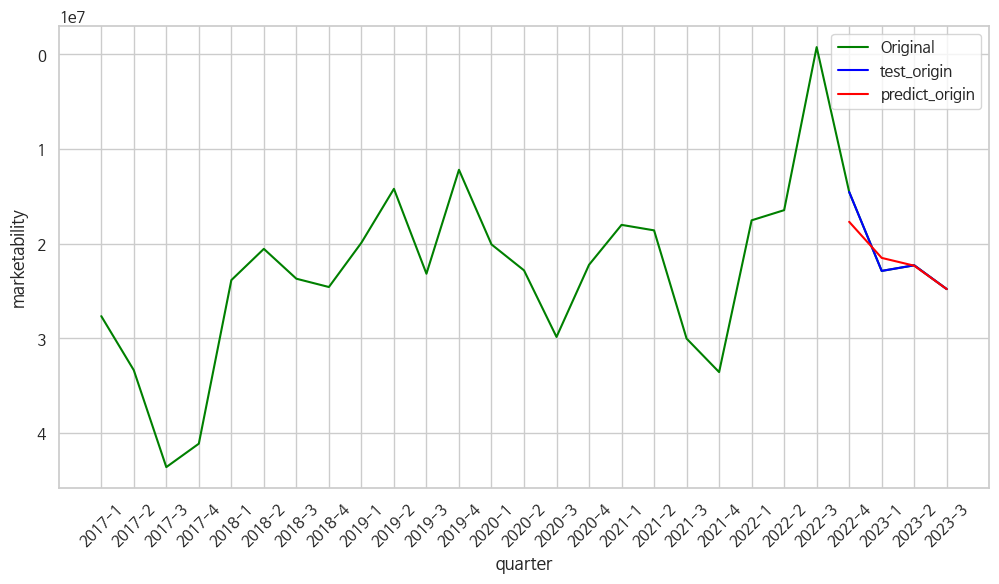

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.551577e+05
std      1.915796e+06
min     -1.374866e+06
25%     -3.437165e+05
50%      2.076400e+04
75%      8.196382e+05
max      3.153969e+06
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.38282734]]
--------------------------------------------------------------------------------
예측된 시장성  : -26606150.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_car[['분기당_매출_금액', '성장성', '시장성']]
y = ap_car.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   9.015685e+08  1.000000 -2.764470e+07
1   9.256975e+08  1.026763 -3.335310e+07
2   9.184951e+08  0.992220 -4.359292e+07
3   8.171343e+08  0.889645 -4.111920e+07
4   1.183295e+09  1.448103 -2.383874e+07
5   1.430130e+09  1.208600 -2.053729e+07
6   1.473284e+09  1.030175 -2.369041e+07
7   1.215917e+09  0.825311 -2.456666e+07
8   8.248041e+08  0.678339 -1.988631e+07
9   1.138850e+09  1.380752 -1.419268e+07
10  8.874956e+08  0.779291 -2.316269e+07
11  1.158220e+09  1.305043 -1.218366e+07
12  7.755070e+08  0.669568 -2.006626e+07
13  9.986739e+08  1.287769 -2.280562e+07
14  7.874928e+08  0.788538 -2.984190e+07
15  9.146470e+08  1.161467 -2.221798e+07
16  9.282389e+08  1.014860 -1.800176e+07
17  1.009424e+09  1.087461 -1.858131e+07
18  7.660121e+08  0.758861 -3.001409e+07
19  8.936565e+08  1.166635 -3.355598e+07
20  8.794778e+08  0.984134 -1.752054e+07
21  1.231042e+09  1.399742 -1.644707e+07
22  1.595079e+09  1.295714  7.789677e+05
23  1.374087e+09

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.16120706 0.4855804  0.48047765]
 [0.20853432 0.46749816 0.4238371 ]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4516
Epoch 1: val_loss improved from inf to 0.52114, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4516 - val_loss: 0.5211
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4502
Epoch 2: val_loss improved from 0.52114 to 0.51972, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4502 - val_loss: 0.5197
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4489
Epoch 3: val_loss improved from 0.51972 to 0.51831, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.4489 - val_loss: 0.5183
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4475
Epoch 4: val_loss improved from 0.51831 to 0.51689, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.4475 - val_loss: 0.5169
Epoch 5/300
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 915ms/step
[[0.80091166]
 [0.8426055 ]
 [0.5839743 ]
 [0.49350974]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.666667,0.800912
2023-1,0.778494,0.842605
2023-2,0.578657,0.583974
2023-3,0.493510,0.493510


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_car의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.666667,0.800912,0.000000,1.751022,-1.751022e+00
2023-1,0.778494,0.842605,1.458621,2.294854,-8.362327e-01
2023-2,0.578657,0.583974,-1.147954,-1.078596,-6.935811e-02
2023-3,0.493510,0.493510,-2.258569,-2.258569,-7.152557e-07


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


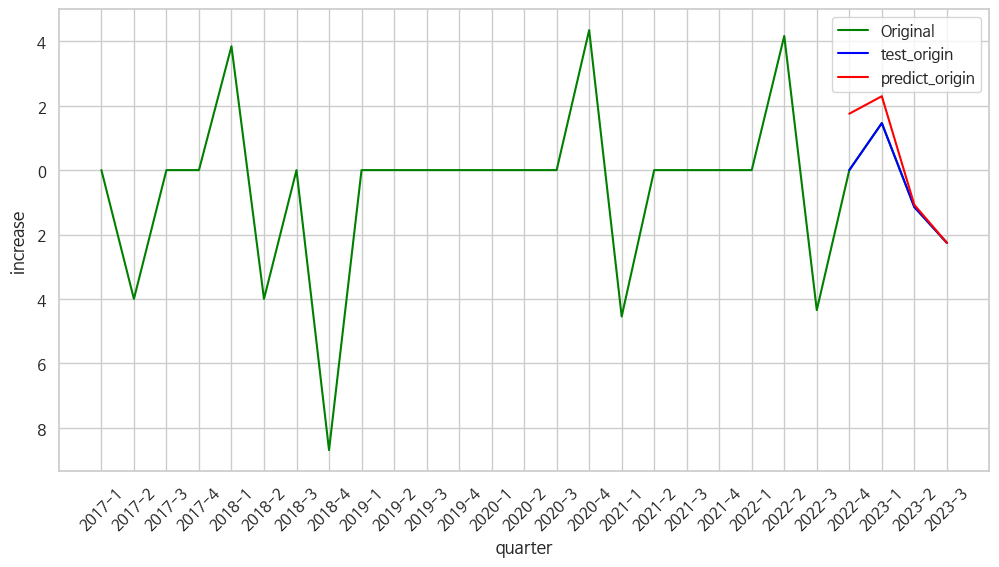

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_car['분기'], ap_car['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -6.641533e-01
std      8.176744e-01
min     -1.751022e+00
25%     -1.064930e+00
50%     -4.527954e-01
75%     -5.201876e-02
max     -7.152557e-07
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 33ms/step
[[0.49771142]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.2037642002105713 


### 추가

In [222]:
ap_car.loc[27] = ['2023-4', '자동차수리', sales, growth, increase, marketability]

<ipython-input-222-5eb04b5f6f9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_car.loc[27] = ['2023-4', '자동차수리', sales, growth, increase, marketability]


In [223]:
final_ap_car = ap_car
final_ap_car

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,자동차수리,9.015685e+08,1.000000,0.000000,-2.764470e+07
1,2017-2,자동차수리,9.256975e+08,1.026763,-4.000000,-3.335310e+07
2,2017-3,자동차수리,9.184951e+08,0.992220,0.000000,-4.359292e+07
3,2017-4,자동차수리,8.171343e+08,0.889645,0.000000,-4.111920e+07
4,2018-1,자동차수리,1.183295e+09,1.448103,3.846154,-2.383874e+07
5,2018-2,자동차수리,1.430130e+09,1.208600,-4.000000,-2.053729e+07
6,2018-3,자동차수리,1.473284e+09,1.030175,0.000000,-2.369041e+07
7,2018-4,자동차수리,1.215917e+09,0.825311,-8.695652,-2.456666e+07
8,2019-1,자동차수리,8.248041e+08,0.678339,0.000000,-1.988631e+07
9,2019-2,자동차수리,1.138850e+09,1.380752,0.000000,-1.419268e+07


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_car[['성장성', '시장성', '순점포증감률']]
y = ap_car.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -2.764470e+07  0.000000
1   1.026763 -3.335310e+07 -4.000000
2   0.992220 -4.359292e+07  0.000000
3   0.889645 -4.111920e+07  0.000000
4   1.448103 -2.383874e+07  3.846154
5   1.208600 -2.053729e+07 -4.000000
6   1.030175 -2.369041e+07  0.000000
7   0.825311 -2.456666e+07 -8.695652
8   0.678339 -1.988631e+07  0.000000
9   1.380752 -1.419268e+07  0.000000
10  0.779291 -2.316269e+07  0.000000
11  1.305043 -1.218366e+07  0.000000
12  0.669568 -2.006626e+07  0.000000
13  1.287769 -2.280562e+07  0.000000
14  0.788538 -2.984190e+07  0.000000
15  1.161467 -2.221798e+07  4.347826
16  1.014860 -1.800176e+07 -4.545455
17  1.087461 -1.858131e+07  0.000000
18  0.758861 -3.001409e+07  0.000000
19  1.166635 -3.355598e+07  0.000000
20  0.984134 -1.752054e+07  0.000000
21  1.399742 -1.644707e+07  4.166667
22  1.295714  7.789677e+05 -4.347826
23  0.861454 -1.452405e+07  0.000000
24  1.033850 -2.286548e+07  1.458621
25  1.047609 -2.227322e+07 -1.147954
2

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.46749816 0.4238371  0.49350967]
 [0.41424249 0.38282731 0.49771141]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2093
Epoch 1: val_loss improved from inf to 0.25160, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2093 - val_loss: 0.2516
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2084
Epoch 2: val_loss improved from 0.25160 to 0.25051, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2084 - val_loss: 0.2505
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2075
Epoch 3: val_loss improved from 0.25051 to 0.24943, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2075 - val_loss: 0.2494
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2066
Epoch 4: val_loss improved from 0.24943 to 0.24834, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2066 - val_loss: 0.2483
Epoch 5/300
1/1 [=================

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 687ms/step
[[0.36097172]
 [0.34451005]
 [0.3778993 ]
 [0.3443287 ]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_car.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.142091,0.360972
2023-2,0.161207,0.344510
2023-3,0.208534,0.377899
2023-4,0.286150,0.344329


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_car.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_car의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.142091,0.360972,8.838150e+08,1.065282e+09,-181466688.0
2023-2,0.161207,0.344510,8.996635e+08,1.051634e+09,-151970304.0
2023-3,0.208534,0.377899,9.389009e+08,1.079316e+09,-140414784.0
2023-4,0.286150,0.344329,1.003250e+09,1.051484e+09,-48233920.0


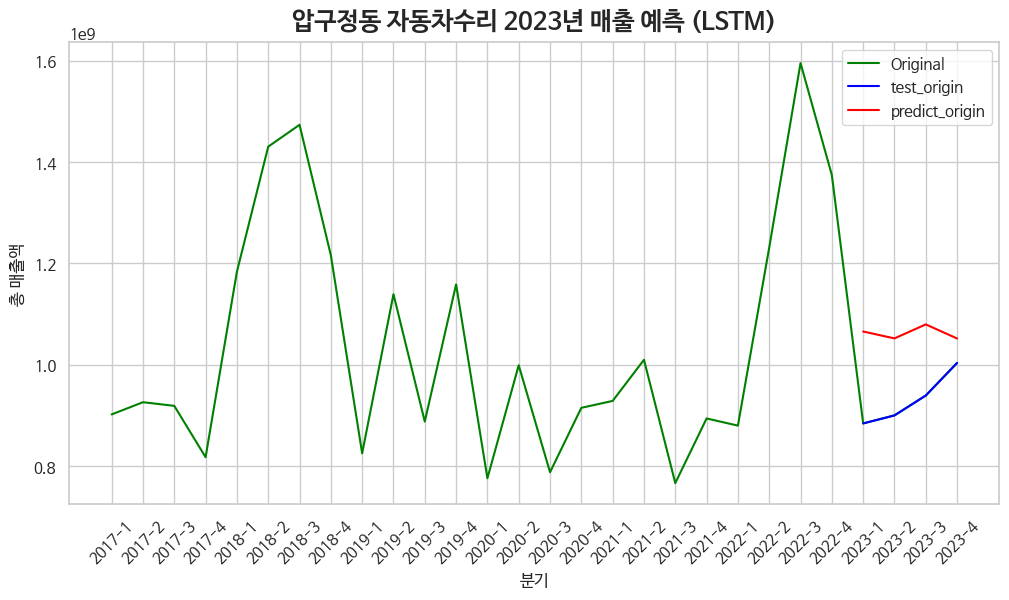

In [233]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 자동차수리 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_car['분기'], ap_car['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()